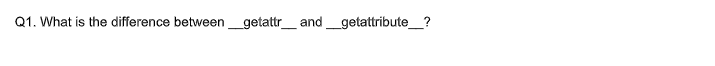

- A key difference between `__getattr__` and `__getattribute__` is that `__getattr__` is only invoked if the attribute wasn't found the usual ways. It's good for implementing a fallback for missing attributes, and is probably the one of two you want.
- `__getattribute__` is invoked before looking at the actual attributes on the object, and so can be tricky to implement correctly. You can end up in infinite recursions very easily.

- Python will call `__getattr__` method whenever you request an attribute that hasn't already been defined. 
- In the following example my class Count has no `__getattr__` method. 
- Now in main when I try to access both `obj1.mymin` and `obj1.mymax` attributes everything works fine. 
- But when I try to access `obj1.mycurrent attribute -- Python gives me AttributeError: 'Count' object has no attribute 'mycurrent'`

In [2]:
class Count():
    def __init__(self,mymin,mymax):
        self.mymin=mymin
        self.mymax=mymax

obj1 = Count(1,10)
print(obj1.mymin)
print(obj1.mymax)
print(obj1.mycurrent)

Now my class Count has `__getattr__` method. Now when I try to access `obj1.mycurrent attribute` -- python returns me whatever I have implemented in my `__getattr__` method. In my example whenever I try to call an attribute which doesn't exist, python creates that attribute and sets it to integer value 0.



In [4]:
class Count:
    def __init__(self,mymin,mymax):
        self.mymin=mymin
        self.mymax=mymax    

    def __getattr__(self, item):
        self.__dict__[item]=0
        return 0

obj1 = Count(1,10)
print(obj1.mymin)
print(obj1.mymax)
print(obj1.mycurrent1)

Now lets see the `__getattribute__` method. If you have `__getattribute__` method in your class, python invokes this method for every attribute regardless whether it exists or not. So why do we need `__getattribute__` method? One good reason is that you can prevent access to attributes and make them more secure as shown in the following example.

Whenever someone try to access my attributes that starts with substring 'cur' python raises AttributeError exception. Otherwise it returns that attribute

In [5]:
class Count:

    def __init__(self,mymin,mymax):
        self.mymin=mymin
        self.mymax=mymax
        self.current=None
   
    def __getattribute__(self, item):
        if item.startswith('cur'):
            raise AttributeError
        return object.__getattribute__(self,item) 
        # or you can use ---return super().__getattribute__(item)

obj1 = Count(1,10)
print(obj1.mymin)
print(obj1.mymax)
print(obj1.current)

Important: In order to avoid infinite recursion in `__getattribute__` method, its implementation should always call the base class method with the same name to access any attributes it needs. For example: `object.__getattribute__(self, name)` or `super().__getattribute__(item)` and not `self.__dict__[item]`

If your class contain both getattr and getattribute magic methods then `__getattribute__` is called first. But if `__getattribute__` raises AttributeError exception then the exception will be ignored and `__getattr__` method will be invoked. See the following example:

In [6]:
class Count(object):

    def __init__(self,mymin,mymax):
        self.mymin=mymin
        self.mymax=mymax
        self.current=None

    def __getattr__(self, item):
            self.__dict__[item]=0
            return 0

    def __getattribute__(self, item):
        if item.startswith('cur'):
            raise AttributeError
        return object.__getattribute__(self,item)
        # or you can use ---return super().__getattribute__(item)
        # note this class subclass object

obj1 = Count(1,10)
print(obj1.mymin)
print(obj1.mymax)
print(obj1.current)

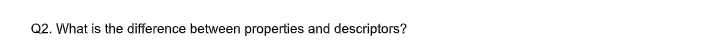

### Descriptors

- Python descriptors are created to manage the attributes of different classes which use the object as reference. In descriptors we used three different methods that are `__getters__()`, `__setters__()`, and `__delete__()`.

- If any of those methods are defined for an object, it can be termed as a descriptor. Normally, Python uses methods like getters and setters to adjust the values on attributes without any special processing. It’s just a basic storage system. Sometimes, You might need to validate the values that are being assigned to a value.

- `gfg.__get__(self, obj, type=None) :` This attribute is called when you want to retrieve the information `(value = obj.attr)`, and whatever it returns is what will be given to the code that requested the attribute’s value.

- `gfg.__set__(self, obj, value) :` This method is called to set the values of an attribute `(obj.attr = 'value')`, and it will not return anything to you.

- `gfg.__delete__(self, obj) :` This method is called when the attribute is deleted from an object `(del obj.attr)`
 

### Property

- The `property()` construct returns the property attribute.

###  property() Parameters
The property() takes four optional parameters:

- fget (optional) - Function for getting the attribute value. Defaults to None.
- fset (optional) - Function for setting the attribute value. Defaults to None.
- fdel (optional) - Function for deleting the attribute value. Defaults to None.
- doc (optional) - A string that contains the documentation (docstring) for the attribute. Defaults to None.


- Return value from property()

- property() returns the property attribute from the given getter, setter, and deleter.

- If no arguments are given, property() returns a base property attribute that doesn't contain any getter, setter or deleter.

- If doc isn't provided, property() takes the docstring of the getter function.

In [3]:
# Python program to explain property() function 
    
# Alphabet class 
class Alphabet: 
    def __init__(self, value): 
        self._value = value 
            
    # getting the values 
    def getValue(self): 
        print('Getting value') 
        return self._value 
            
    # setting the values 
    def setValue(self, value): 
        print('Setting value to ' + value) 
        self._value = value 
            
    # deleting the values 
    def delValue(self): 
        print('Deleting value') 
        del self._value 
        
    value = property(getValue, setValue, delValue, ) 
    
# passing the value 
x = Alphabet('GeeksforGeeks') 
print(x.value) 
    
x.value = 'GfG'
    
del x.value 

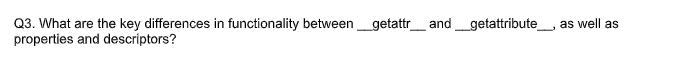

### Difference between `__getattr__` and `__getattribute__`

- - A key difference between `__getattr__` and `__getattribute__` is that `__getattr__` is only invoked if the attribute wasn't found the usual ways. It's good for implementing a fallback for missing attributes, and is probably the one of two you want.
- `__getattribute__` is invoked before looking at the actual attributes on the object, and so can be tricky to implement correctly. You can end up in infinite recursions very easily.

### Difference between `Descriptors` and `Property`

### Descriptor

- Python descriptors are created to manage the attributes of different classes which use the object as reference. In descriptors we used three different methods that are `__getters__()`, `__setters__()`, and `__delete__()`.

- If any of those methods are defined for an object, it can be termed as a descriptor. Normally, Python uses methods like getters and setters to adjust the values on attributes without any special processing. It’s just a basic storage system. Sometimes, You might need to validate the values that are being assigned to a value.

### Property

- The `property()` construct returns the property attribute.

###  property() Parameters
The property() takes four optional parameters:

- fget (optional) - Function for getting the attribute value. Defaults to None.
- fset (optional) - Function for setting the attribute value. Defaults to None.
- fdel (optional) - Function for deleting the attribute value. Defaults to None.
- doc (optional) - A string that contains the documentation (docstring) for the attribute. Defaults to None.
